In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

# New Section

In [ ]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


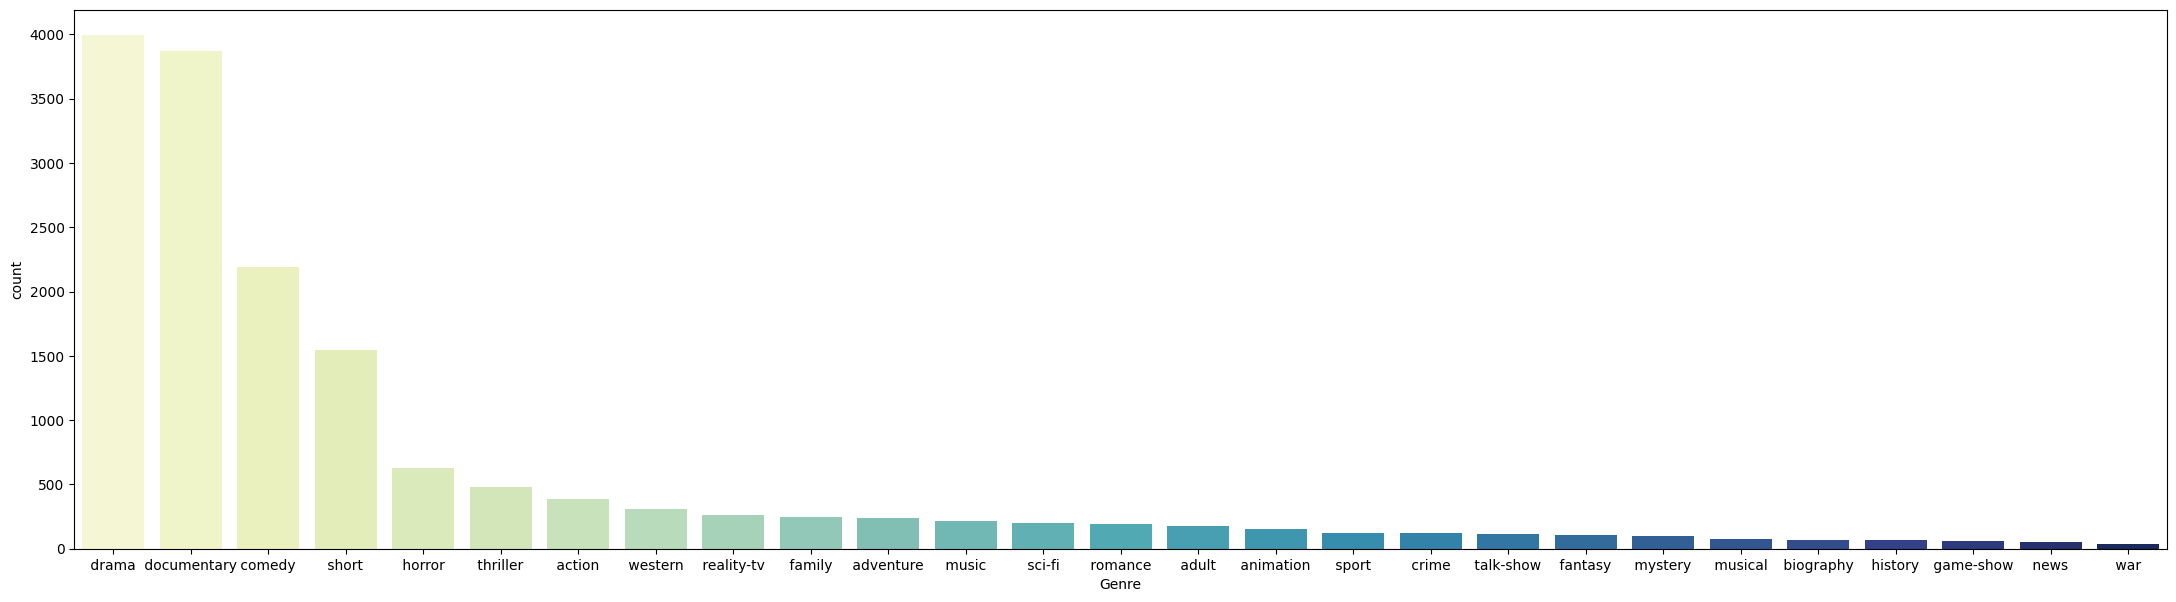

In [ ]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="Genre", order= train_data["Genre"].value_counts().index, palette = "YlGnBu")
plt.show()

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_data["TextCleaning"] = train_data["Description"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["Description"].apply(cleaning_data)

In [ ]:
train_data

,Title,Genre,Description,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
16011,Code Name: Wolverine (1996),thriller,Harry Gordini is on his way to Italy for a ho...,harry gordini way italy holiday family way acc...
16012,I'm No Brat (1990),adult,Randy West and Nikki Randall are a happily ma...,randy west nikki randall happily married coupl...
16013,Look 4 Them (2014),drama,"How far can you go, when you fight for the ri...",far fight right cause perspective greater good...
16014,Sealed Lips (2012),fantasy,Set in an empty factory Sealed Lips is a stor...,set empty factory sealed lips story told eyes ...


In [ ]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

In [ ]:
X = X_train
y = train_data["Genre"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [ ]:
model.score(X_train, Y_train)

0.898688729316266

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' documentary ',
       ' documentary '], dtype=object)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.49797065251326883
